# Pytorch 101 - Tensors

Tensor is a just a multi-dimensional array just like numpy's ndarry.
Both are wrappers around contiguous memory blocks
PyTorch tensors differs because:
 - They can live on GPU(Cuda)
 - Support autograd (automatic differentiation)
 - Have views and copies (important for memory efficiency )

### Tensor structure (Conceptually)
- Data Pointer -> points to raw memory where elements are stored
- Shape -> dimensions of the tensor
- Stride -> How many steps to jump in memory to move along each axis
- DataType(dtype) -> eg. `float64`, `int64`
- Device -> CPU, GPU, etc.

#### Stride
Stride(3, 1) means:
 - To move one row down -> jump 3 elements in memory
 - To move one column right -> jump 1 element

In [13]:
import torch 

x = torch.tensor(
    [[1, 2],
    [3, 4]],
    dtype=torch.int16,
    device='cuda:0',
    requires_grad=False,
    pin_memory=True, # lock the memory prevents os from moving it around benefits performance during data transfer from cpu to gpu
)

print(x)
print(x.dtype)
print(x.stride())
print(x.shape)
print(x.device)

tensor([[1, 2],
        [3, 4]], device='cuda:0', dtype=torch.int16)
torch.int16
(2, 1)
torch.Size([2, 2])
cuda:0


## AutoGrad
Gradients are essentially derivatives (the rate of change) for functions with multiple variables, which plays crucial role in help neural network learn.
The mathematical operations for finding derivatives are defined for continuous functions, floating-point numbers (like 1.0, 2.89) are used to represent continuous values.
When we set Pytorch `require_grad=True` on a tensor, it tells torch's autograd engine to track all the operations performed on it, so it can automatically compute the gradients during back-propogation.

> Since gradients are only mathematically well-defined for continuous functions, torch restricts this feature to tensors with float or completx data types: Doesn't work with discrete values like int.

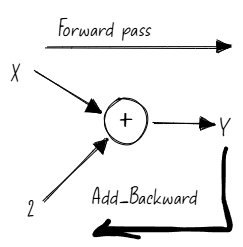


In [30]:
import torch 

x = torch.randn(3, requires_grad=True)

print(x)

# When you do x += 2 with x being tensor enabled with requires_grad=True, you cannot do that in-place operation, because it would modify the value of x, and the autograd engine would not be able to track the changes properly.
# Instead, you should create a new tensor y that is the result of the operation.
# wrong: x += 2
y = x + 2
z = y.sum()
z.backward()
x.grad


tensor([-0.6971, -2.6107, -0.7849], requires_grad=True)


tensor([1., 1., 1.])

### Tensor Operations

In [33]:
# Indexing and slicing tensors
import torch 
x =  torch.tensor(
    [[1, 2], [4, 5]]
)

print("Original Tensor:\n", x)
print(x)

# Access first row
print(x[0])

# Access single element
print(x[1, 1])


Original Tensor:
 tensor([[1, 2],
        [4, 5]])
tensor([[1, 2],
        [4, 5]])
tensor([1, 2])
tensor(5)


In [34]:
# Slicing tensor
import torch

x = torch.tensor(
    [[1, 2, 3],
     [4, 5, 6]]
)
print("Original tensors: ", x)

print(x[:, 1]) # all rows, second column
x_sliced = x[:, 1:]
print("\nSliced Tensor:\n", x_sliced)

Original tensors:  tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([2, 5])

Sliced Tensor:
 tensor([[2, 3],
        [5, 6]])


In [32]:
# Indexing with boolean masks
import torch
x = torch.arange(10)
print("Original tensor:", x)

# assume, we want to find elements greater than 5
mask = x > 5
print("\nBoolean Mask (x > 5):", mask)

print("\nElements greater than 5:", x[mask])

Original tensor: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Boolean Mask (x > 5): tensor([False, False, False, False, False, False,  True,  True,  True,  True])

Elements greater than 5: tensor([6, 7, 8, 9])


In [ ]:
# torch.cat vs torch.stack
# (Joining tensors)

import torch

# cat glues tensors together along an existing dimension. The tensor must have the same shape, 
# except in the dimension corresponding to the concatenation dimension.

t1 = torch.tensor([[1, 2], [3, 4]])
t2 = torch.tensor([[5, 6], [7, 8]])
print(t1.shape)
print(t2.shape)

# concatenate along rows (dim:0)
t_cat = torch.cat(
    (t1, t2), dim=0
)

print("Concatenated Tensor:\n", t_cat)
print("Resulting shape:", t_cat.shape)

# Concat along columns (dim:1)
t_cat_col = torch.cat(
    (t1, t2), dim=1
)

print("Concatenated Tensor along columns:\n", t_cat_col)
print("Resulting shape:", t_cat_col.shape)


print("--" * 10)

# Stack create a new dimension and joins the tensors along it.
# This is used to create a higher-dimensional tensor from a list of lower-dimensional ones
# All tensors being stacked must have the exact same shape

stack_dim0 = torch.stack([t1, t2], dim=0)
print("Stacked Tensor along new dimension (dim=0):\n", stack_dim0)
print("Resulting shape:", stack_dim0.shape)


torch.Size([2, 2])
torch.Size([2, 2])
Concatenated Tensor:
 tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])
Resulting shape: torch.Size([4, 2])
Concatenated Tensor along columns:
 tensor([[1, 2, 5, 6],
        [3, 4, 7, 8]])
Resulting shape: torch.Size([2, 4])
--------------------
Stacked Tensor along new dimension (dim=0):
 tensor([[[1, 2],
         [5, 6]],

        [[3, 4],
         [7, 8]]])
Resulting shape: torch.Size([2, 2, 2])


#### Tensor Math operations

In [ ]:
# 1. Element-wise operations

import torch 

x = torch.tensor([1, 2, 3])
y = torch.tensor([4, 5, 6])

# Most standard math operations (+, -, *, /) work on element-by-element basis.
# but the tensors must have the same shape


z = x + y
print("Element-wise addition:\n", z)

z = x * y
print("Element-wise multiplication:\n", z)

z = x - y
print("Element-wise subtraction:\n", z)

z = x / y
print("Element-wise division:\n", z)

Element-wise addition:
 tensor([5, 7, 9])
Element-wise multiplication:
 tensor([ 4, 10, 18])
Element-wise subtraction:
 tensor([-3, -3, -3])
Element-wise division:
 tensor([0.2500, 0.4000, 0.5000])


In [44]:
# Matrix Multiplication 
import torch

x = torch.tensor([[1, 2], [3, 4]])
y = torch.tensor([[5, 6], [7, 8]])

# The `@` operator or `torch.matmul` can be used for matrix multiplication
# This is dot-production operation (pretty high school math - huh?)
# also same, the column of the first matrix must match the row of the second
z = x @ y
print("Matrix multiplication result:\n", z)

Z_mul = torch.matmul(x, y)
print("Matrix multiplication result using torch.matmul:\n", Z_mul)

Matrix multiplication result:
 tensor([[19, 22],
        [43, 50]])
Matrix multiplication result using torch.matmul:
 tensor([[19, 22],
        [43, 50]])


### Shape Manipulation

- The key idea is that the data is ofter stored in flat, one-dimensional block of memory
- Shape manipulation functions are tools that change how pytorch interprets that block of memory, usually without creating new copies of the data


In [59]:
import torch 

x = torch.arange(12)
print("Original tensor:\n", x)
print("Original shape:", x.shape)

x_3x4 = x.reshape(3, 4) # Note: new copy of the data is not created, only how torch interprets the data is modified
print("Reshaped tensor (3x4):\n", x_3x4) 
print("New shape:", x_3x4.shape)

print("-" * 20)

# -1 trick
# we can use -1 in one of the dimensions, and pytorch will automatically infer the correct size
x_3x4_neg1 = x.reshape(3, -1)
print("Reshaped tensor (3x4 with -1):\n", x_3x4_neg1)
print("New shape:", x_3x4_neg1.shape)

print("-" * 20)
# Squeeze and unsqueeze

x = torch.arange(12).reshape(3, 4)
print("Original shape:", x.shape)

x_batched = x.unsqueeze(dim=0)
print("Batched shape:", x_batched.shape)

x_unbatched = x_batched.squeeze(dim=0)
print("Shape after squeeze(0):", x_unbatched.shape)

print("-" * 20)

# Permute() - Rearranging dimensions

# Fake image tensors: batch x height x width x channels
x_nhwc = torch.randn(1, 224, 224, 3)
print("Original shape:", x_nhwc.shape)

# PyTorch's CNN layer expect (N, C, H, W)
# We need to move the channels dimensions to be after the batch dim
x_permuted = x_nhwc.permute(0, 3, 1, 2)
print("Permuted shape:", x_permuted.shape)


Original tensor:
 tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
Original shape: torch.Size([12])
Reshaped tensor (3x4):
 tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
New shape: torch.Size([3, 4])
--------------------
Reshaped tensor (3x4 with -1):
 tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
New shape: torch.Size([3, 4])
--------------------
Original shape: torch.Size([3, 4])
Batched shape: torch.Size([1, 3, 4])
Shape after squeeze(0): torch.Size([3, 4])
--------------------
Original shape: torch.Size([1, 224, 224, 3])
Permuted shape: torch.Size([1, 3, 224, 224])


### Dataset and DataLoader

`torch.utils.data.Dataset` and `torch.utils.data.DataLoader` are essential tools for managing and loading data in PyTorch. They provide a flexible and efficient way to handle datasets,
whether they are small and in-memory or large and stored on disk.

A `Dataset` is an abstract class that represents a dataset. To create a custom dataset, you need to inherit from `torch.utils.data.Dataset` and implement two methods.

- `__len__(self)`: This method should return the total number of samples in the dataset
- `__getitem__(self, index)`: This method should return the sample at the given index. A sample can be tuple of (data, label), a dictionary, or any other data structure.


A DataLoader is an iterator that provides an efficient way to iterate over a Dataset. It can automatically batch the data, shuffle it, and load it in parallel using multiple workers.


- *Batching*: It groups individual samples into batches of a specified size.
- *Shuffling*: It can shuffle the data at the beginning of each epoch to reduce variance and prevent the model from learning the order of the data.
- *Parallelism*: It can use multiple subprocesses to load the data in parallel, which can significantly speed up data loading, especially for large datasets.


In [3]:
import torch
from torch.utils.data import Dataset, DataLoader


class MyDataset(Dataset):
    def __init__(self):
        self.data = torch.randn(10000, 10)
        self.labels = torch.randint(0, 2, (10000, ))
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        return self.data[index], self.labels[index]
    
    
my_dataset = MyDataset()   
my_dataloader = DataLoader(
    my_dataset,
    batch_size=128,
    shuffle=True,
)

for batch_data, batch_labels in my_dataloader:
    print("Batch data shape:", batch_data.shape)
    print("Batch labels shape:", batch_labels.shape)
    break

Batch data shape: torch.Size([128, 10])
Batch labels shape: torch.Size([128])


### Neural network: Building blocks

1. `nn.Module`: This is the base class for all neural network modules in pytorch. we can create our own network by creating a class that inherits from nn.Module. It provideed essential functionality like tracking all the learnable parameters (weights and biases) of your model.

2. Layers(`nn.Linear`, `nn.Conv2d`, etc.): These are fundamental building blocks that perform the actual data transformation. The most basic and common one is the `nn.Linear` layer, also know as a fully-connected or dense layer. It applies a linear transformation to the incoming data: `y = x.A^T + b`
    - x is the input
    - A is the weight matrix
    - b is the bias vector
    - y is the output
    (the weights and biases are the learnable parameters that get updated during the training process)

3. Activation function (ReLU, Sigmoid, etc.): After a linear transformation we need to introduce non-linearity. Without non-linearity, network cannot learn complex patterns. The
activation function is applies element-wise to the output of a layer.
    - `nn.ReLU`: The rectified Linear unit is the most common activation function. It is a simple function that return `max(0, x)`. It's computationally efficient and helps mitigate the vanishing gradient problem.
    - `nn.Sigmoid`: This function squashes values between 0 and 1. It's often used in the output layer for binary classification problems, where the output can be interpreted as a probability.

In [4]:
import torch
import torch.nn as nn


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

class MyNet(nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        self.fc = nn.Linear(10, 512)
        self.fc2 = nn.Linear(512, 246)
        self.fc3 = nn.Linear(246, 1)
        
    def forward(self, x):
        x = self.fc(x)
        x = torch.relu(x)
        x = self.fc2(x)
        x = torch.relu(x)
        x = self.fc3(x)
        return x

net = MyNet().to(device)

# training loop

criterion = nn.BCEWithLogitsLoss()
optim = torch.optim.Adam(net.parameters(), lr=0.001)

num_epoch = 50
epoch_loss = []

for epoch in range(num_epoch):
    running_loss = 0.0
    
    for i, data in enumerate(my_dataloader, 0):
        inputs, labels = data
    
        inputs = inputs.to(device)
        labels = labels.to(device)

        optim.zero_grad()
        outputs = net(inputs)
        
        outputs = outputs.view(-1)
        labels = labels.float()
        
        loss = criterion(outputs, labels)
        
        loss.backward()
        optim.step()
        running_loss += loss.item()
        if i % 10 == 9:
            print(f"Epoch [{epoch+1}/{num_epoch}], Step [{i+1}/{len(my_dataloader)}], Loss: {running_loss/10:.4f}")
            running_loss = 0.0

    epoch_loss.append(running_loss / len(my_dataloader))

with torch.no_grad():
    sample_data = torch.randn(1, 10).to(device)
    prediction = net(sample_data)
    pred_class = (torch.sigmoid(prediction) > 0.5).int().item()
    print("Predicted class:", pred_class)

Using device: cuda
Epoch [1/50], Step [10/79], Loss: 0.7000
Epoch [1/50], Step [20/79], Loss: 0.6976
Epoch [1/50], Step [30/79], Loss: 0.7015
Epoch [1/50], Step [40/79], Loss: 0.6958
Epoch [1/50], Step [50/79], Loss: 0.6930
Epoch [1/50], Step [60/79], Loss: 0.6938
Epoch [1/50], Step [70/79], Loss: 0.6928
Epoch [2/50], Step [10/79], Loss: 0.6905
Epoch [2/50], Step [20/79], Loss: 0.6928
Epoch [2/50], Step [30/79], Loss: 0.6911
Epoch [2/50], Step [40/79], Loss: 0.6897
Epoch [2/50], Step [50/79], Loss: 0.6929
Epoch [2/50], Step [60/79], Loss: 0.6902
Epoch [2/50], Step [70/79], Loss: 0.6964
Epoch [3/50], Step [10/79], Loss: 0.6909
Epoch [3/50], Step [20/79], Loss: 0.6904
Epoch [3/50], Step [30/79], Loss: 0.6888
Epoch [3/50], Step [40/79], Loss: 0.6894
Epoch [3/50], Step [50/79], Loss: 0.6903
Epoch [3/50], Step [60/79], Loss: 0.6923
Epoch [3/50], Step [70/79], Loss: 0.6947
Epoch [4/50], Step [10/79], Loss: 0.6875
Epoch [4/50], Step [20/79], Loss: 0.6893
Epoch [4/50], Step [30/79], Loss: 0.68

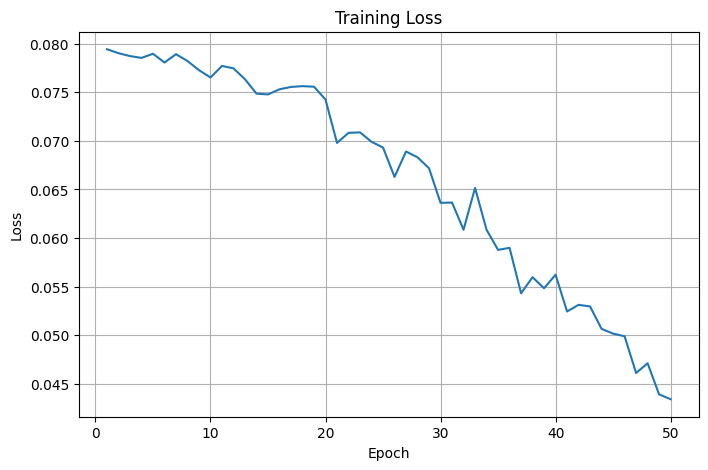

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epoch + 1), epoch_loss)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

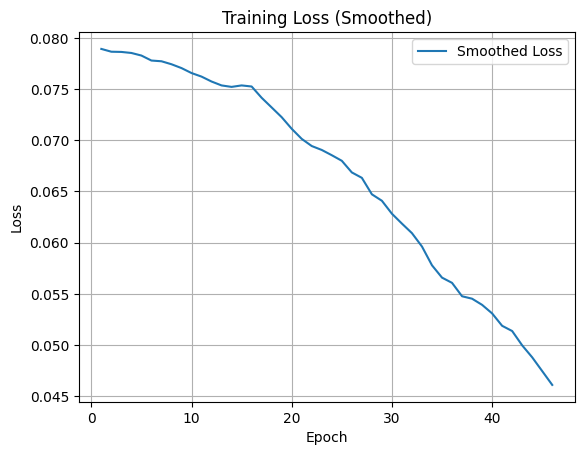

In [7]:
import numpy as np

def moving_average(x, w=5):
    return np.convolve(x, np.ones(w)/w, mode='valid')

smoothed_losses = moving_average(epoch_loss, w=5)

plt.plot(range(1, len(smoothed_losses)+1), smoothed_losses, label="Smoothed Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss (Smoothed)")
plt.legend()
plt.grid(True)
plt.show()
